In [3]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df = df.drop(['beats'], axis=1)

In [6]:
df.head()

,class_name,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


## Visualizing the features

<IPython.core.display.Javascript object>


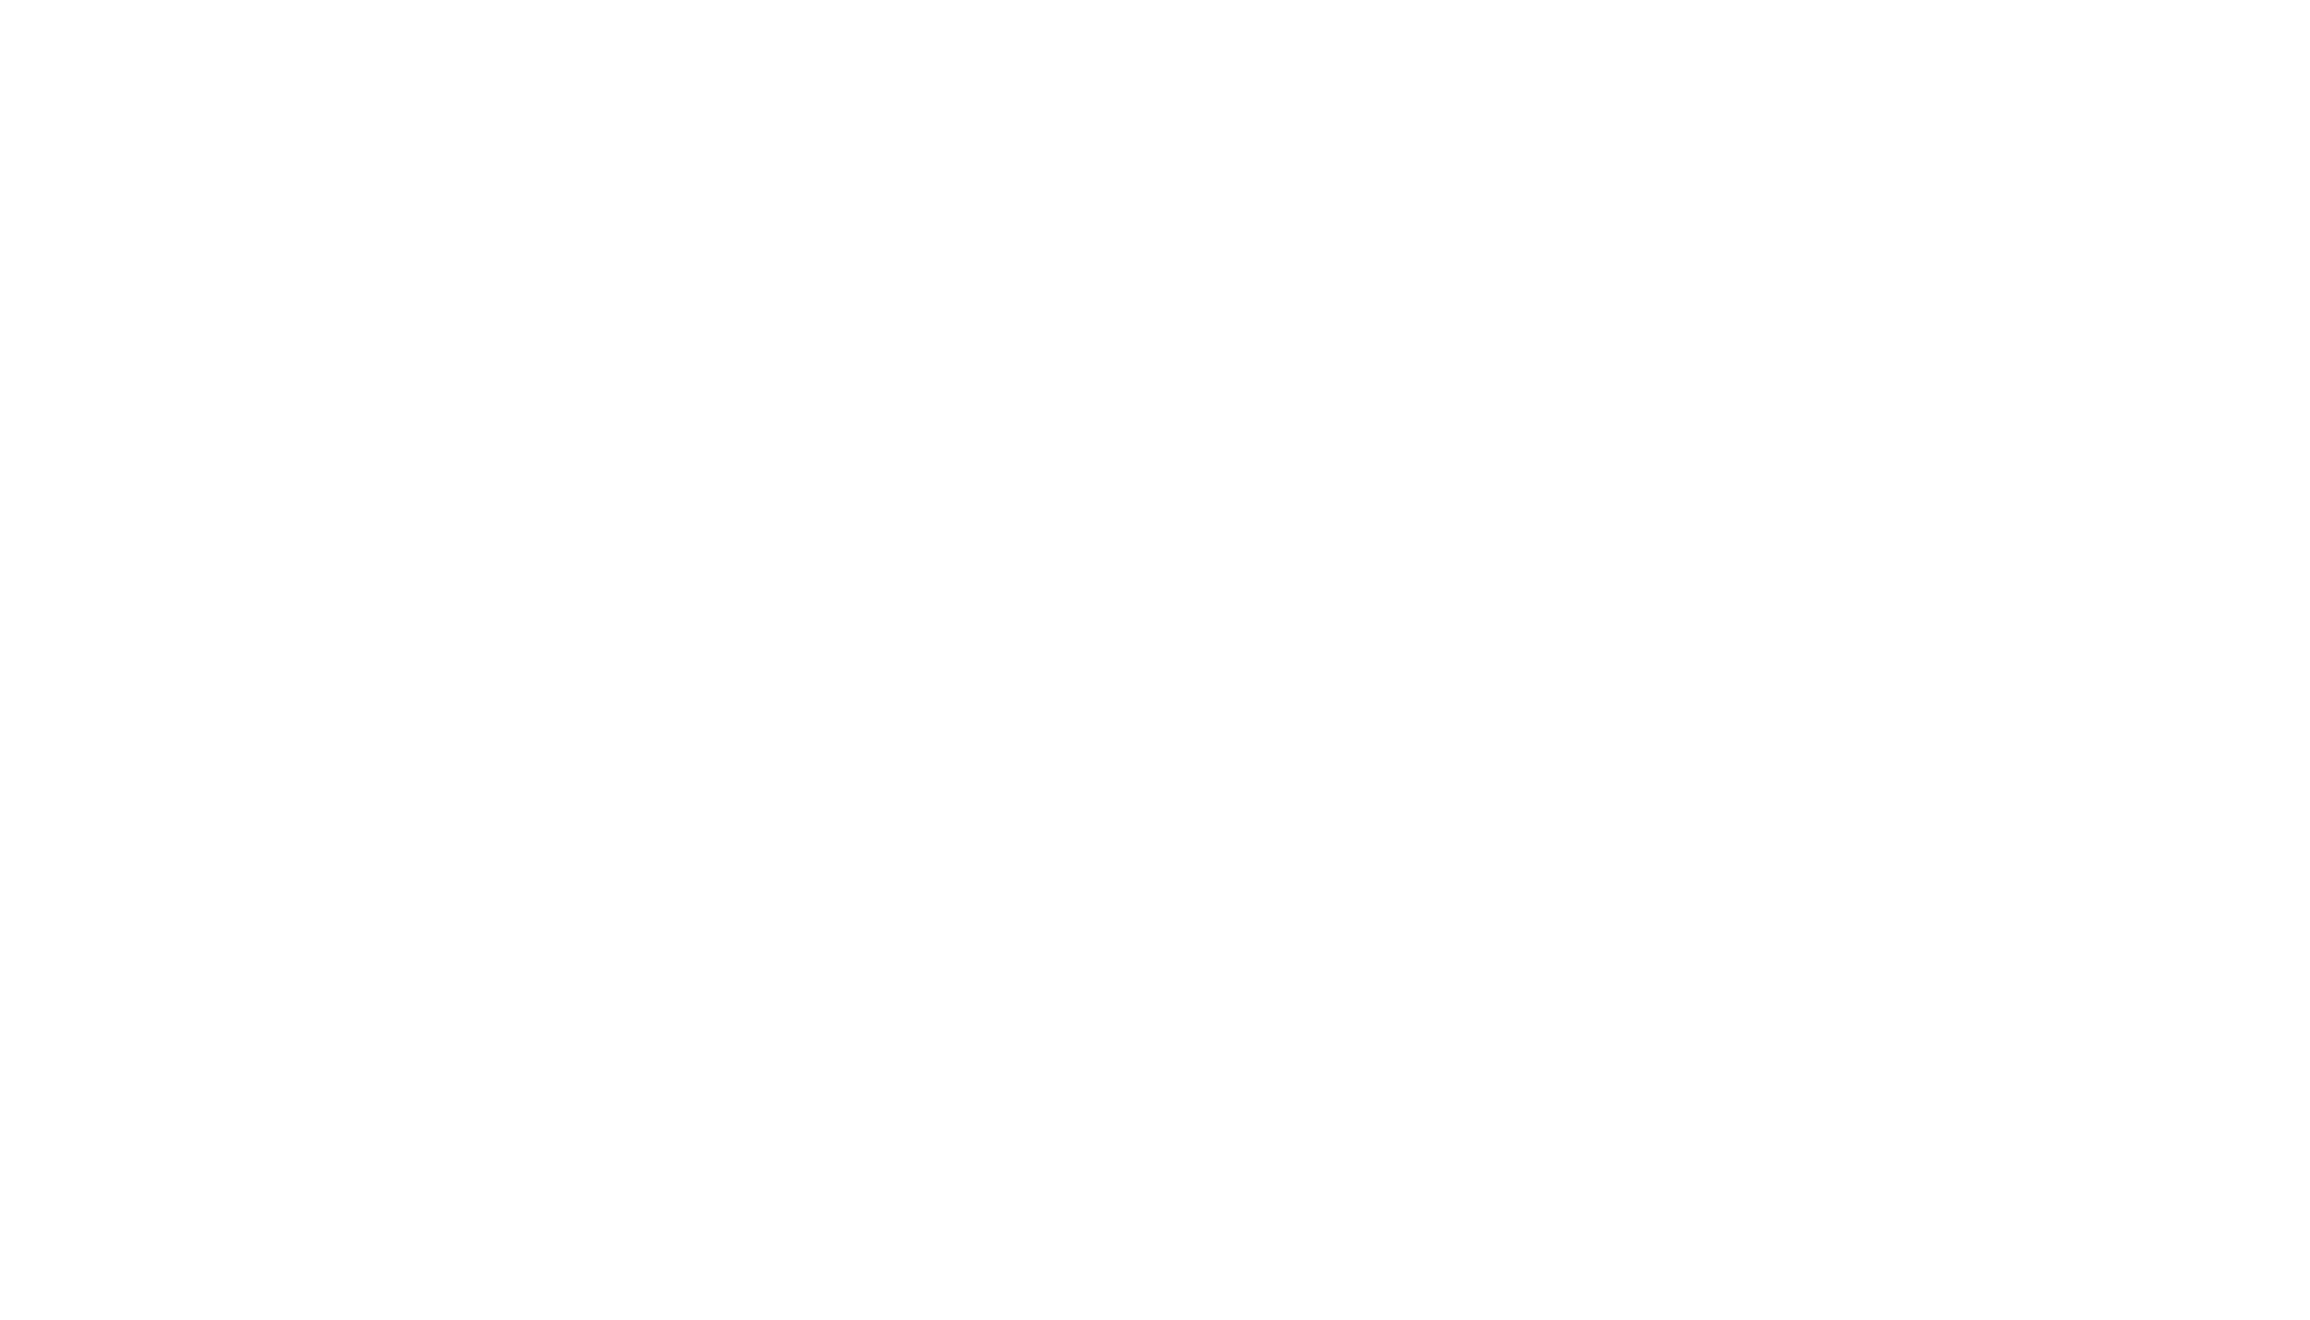

<IPython.core.display.Javascript object>


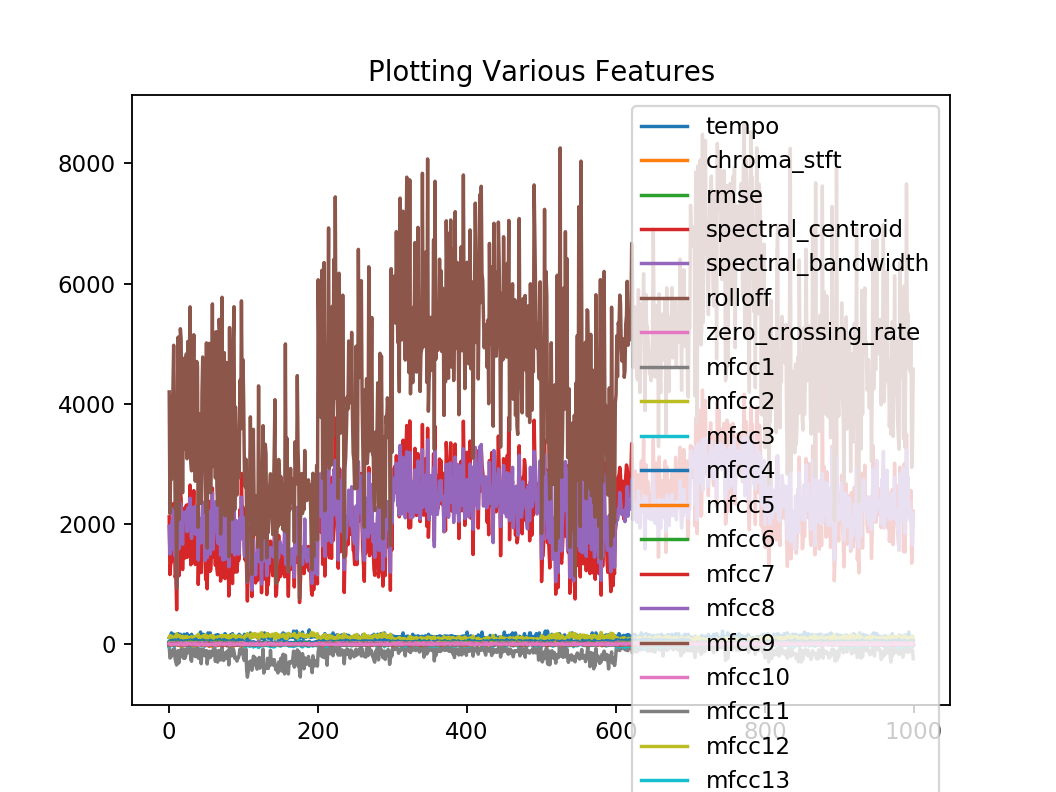

Text(0.5, 1.0, 'Plotting Various Features')

In [7]:
plt.figure(figsize = (14,8))
df.plot();
plt.title("Plotting Various Features")

# Preprocesing

In [44]:
df['class_name'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [45]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [46]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.class_name.unique()))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [47]:
df['class_name'].unique()

[blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
Categories (10, object): [blues, classical, country, disco, ..., metal, pop, reggae, rock]

In [48]:
cols = list(df.columns)
cols.remove('label')
cols.remove('class_label')
cols.remove('class_name')
#df[cols]

# Data Splitting for Training and Testing

In [49]:

from sklearn.model_selection import train_test_split

X = df.iloc[:,1:28]
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# Min-Max Normalization

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

# Feature importance using Random Forest

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<IPython.core.display.Javascript object>


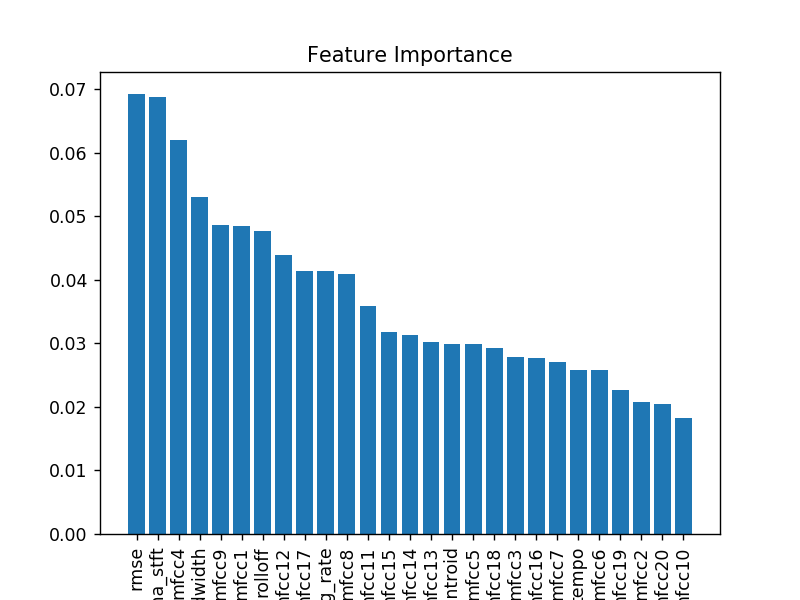

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

# Feature importance using Decision Tree

<IPython.core.display.Javascript object>


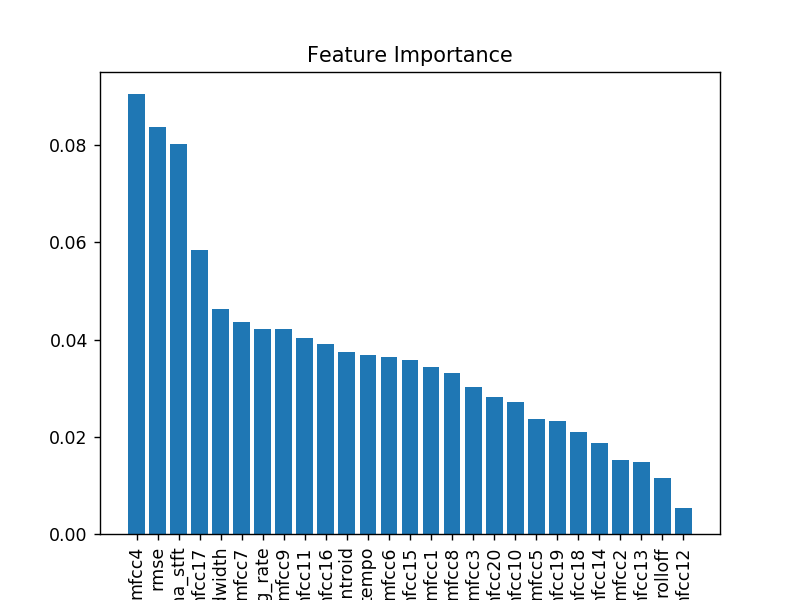

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

# K-Nearest Neighbors

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.652

# Predicting using KNN

In [172]:
M=[83.35433467741936,
 0.2734538113412606,
 0.083626986,
 2528.5427638029996,
 2834.059473941224,
 5870.734197443182,
 0.08965025859557109,
 -170.0451337587287,
 78.64052391310022,
 19.73390815686492,
 20.45083301977086,
 4.103513470142354,
 9.841905137790027,
 -4.316148299991578,
 3.300070275402192,
 0.42470093170342754,
 2.4894423856050194,
 -5.262960696924491,
 2.4053888105572274,
 -6.255715006306157,
 -1.9169185194172942,
 -5.735398245249971,
 5.514549664140068,
 2.40016767786427,
 2.823111000047713,
 -2.961309211248711,
 4.652922866867293]

I=[123.046875,
 0.4567724327382737,
 0.12410879,
 1201.765264325625,
 1650.6201223154712,
 2738.785007569204,
 0.04896058607266436,
 -212.07783983932353,
 131.30297445631953,
 4.8053743253176835,
 66.59354938703487,
 -3.004354223781912,
 24.634508356807956,
 -0.343661164344035,
 21.75253182040645,
 6.0557412578525405,
 4.904228380995743,
 -2.3592505676895565,
 -4.65832772973829,
 12.196297160233412,
 -9.924668100184526,
 -1.2445875802255124,
 -1.313186626107297,
 4.288184796260309,
 -6.3347990440410245,
 2.0393912440787867,
 -0.7614436290123355]

J=[92.28515625,
 0.6303756291717987,
 0.047687173,
 3633.7789006864687,
 2638.3907703124005,
 5980.698932150136,
 0.25440443840579713,
 -339.86320526511474,
 27.583775753299793,
 5.1509585479361535,
 13.784279397386983,
 -2.7766199004286993,
 8.02878112202863,
 1.2499078170564941,
 5.881484138193055,
 -0.9678907811133091,
 8.476581589200903,
 1.425552759598358,
 6.677279286050392,
 2.876966204723094,
 4.339102225261538,
 -0.24978379056567745,
 0.8238731094819824,
 2.093811206277509,
 3.9489899888701094,
 -1.454133827695254,
 1.5343949295753323]

In [173]:
for i in [M,I,J]:    
    d1 =np.array(i)
    data1 = scaler.transform([d1])

    genre_prediction = knn.predict(data1)
    print(lookup_genre_name[genre_prediction[0]])

country
reggae
metal


# Support Vector Machine

In [174]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C=10).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.732

# Predicting Using SVM

In [170]:
for i in [M,I,J]:    
    d1 =np.array(i)
    data1 = scaler.transform([d1])

    genre_prediction = clf.predict(data1)
    print(lookup_genre_name[genre_prediction[0]])

country
blues
hiphop
